# Support Vector Regression (SVR)

## Data Preprocessing


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset from a CSV file
dataset = pd.read_csv('/content/drive/My Drive/KaggleDatasets/HeightVsWeight.csv')

# Extracting features and target variable from the dataset
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1:2].values

## Splitting the dataset into the training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

## Fitting SVR to the training data

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Visualising the SVR resutlts

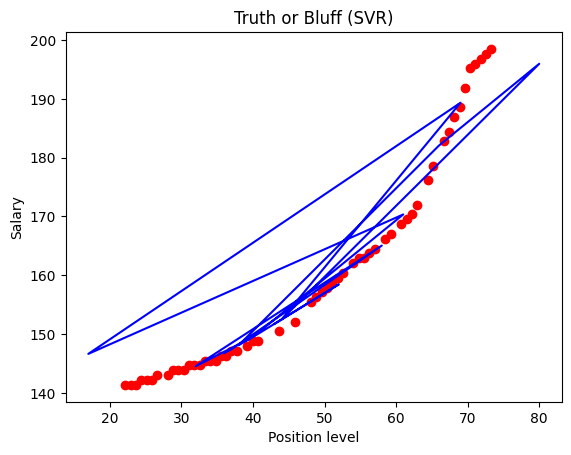

In [ ]:
# Reshape the input arrays to 2D (n_samples, n_features)
X_train_2d = sc_X.inverse_transform(X_train.reshape(-1, 1))
X_test_2d = sc_X.inverse_transform(X_test.reshape(-1, 1))
y_train_2d = sc_y.inverse_transform(y_train.reshape(-1, 1))
y_pred_2d = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1, 1))

# Now you can plot using the reshaped arrays
plt.scatter(X_train_2d, y_train_2d, color='red')
plt.plot(X_test_2d, y_pred_2d, color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Model testing and evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test contains the actual target values for the testing set
# First, get the predictions for the test data
y_pred = regressor.predict(X_test)

# Inverse transform the predicted and actual values if they were scaled
y_pred_inv = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = sc_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R^2 Score: 0.947924600886134
Mean Absolute Error (MAE): 2.5750557409472017
Mean Squared Error (MSE): 16.39194696373534
Root Mean Squared Error (RMSE): 4.048696946393412
